In [1]:
import sqlite3
import pickle
import pandas as pd

In [2]:
conn = sqlite3.connect('/Users/Tinaren/Desktop/LambdaSchool/Unit3/WebApp/Unit3_TwitOff/twitoff/twitoff.sqlite')

In [3]:
def get_data(query, conn):
    cursor = conn.cursor()
    result = cursor.execute(query).fetchall()
    
    columns = list(map(lambda x: x[0], cursor.description))
    
    df = pd.DataFrame(data=result, columns=columns)
    return df

In [16]:
query = '''
SELECT
	tweet.id,
	tweet.text,
	tweet.embedding,
	user.username
from tweet 
join user on tweet.user_id = user.id;
'''
df = get_data(query, conn)
df['embedding_decoded'] = df.embedding.apply(lambda x:pickle.loads(x[2:]))
print(df.shape)
df.head()

(5352, 5)


,id,text,embedding,username,embedding_decoded
0,1293525010523578375,Congratulations to future Republican Star Marj...,b'\x80\x04\x95\x05\x1b\x00\x00\x00\x00\x00\x00...,realDonaldTrump,"[-0.692643, -0.348438, 0.294907, -0.579693, 0...."
1,1293517514798960640,The “suburban housewife” will be voting for me...,b'\x80\x04\x95\x05\x1b\x00\x00\x00\x00\x00\x00...,realDonaldTrump,"[-0.466329, -0.126989, 0.478333, -0.520746, 0...."
2,1293513735533924352,96% Approval Rating in the Republican Party. T...,b'\x80\x04\x95\x05\x1b\x00\x00\x00\x00\x00\x00...,realDonaldTrump,"[-0.274015, -0.333424, 0.677079, 0.194517, -0...."
3,1293510853074051073,.@KamalaHarris started strong in the Democrat ...,b'\x80\x04\x95\x05\x1b\x00\x00\x00\x00\x00\x00...,realDonaldTrump,"[-1.01536, -0.503234, 0.537722, -0.376378, 0.2..."
4,1293368220498505728,https://t.co/IlYgFXtpPq,b'\x80\x04\x95\x05\x1b\x00\x00\x00\x00\x00\x00...,realDonaldTrump,"[-0.23339, -0.156573, 1.54538, -0.592459, 1.20..."


In [17]:
df.username.value_counts()

billgates          2885
nasa               1689
elonmusk            410
realDonaldTrump     368
Name: username, dtype: int64

In [8]:
user1_embeddings = df.embedding_decoded[df.username == 'nasa']
user2_embeddings = df.embedding_decoded[df.username == 'elonmusk']
embeddings = pd.concat([user1_embeddings,user2_embeddings])
embeddings_df = pd.DataFrame(embeddings.tolist(), columns=[f'dim{i}' for i in range(768)])

In [9]:
embeddings_df.shape

(2099, 768)

In [10]:
embeddings_df.head()

,dim0,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,...,dim758,dim759,dim760,dim761,dim762,dim763,dim764,dim765,dim766,dim767
0,-0.353550,-0.290994,0.554883,-0.675980,0.734896,-0.025641,-0.043498,0.372653,-0.282431,-1.206040,...,-0.281040,-0.485857,-0.287538,-1.70236,0.854221,-0.593847,-0.432663,0.663515,0.119870,-0.032651
1,-0.178458,0.220421,0.295155,-0.506611,0.844021,-0.169817,-0.032875,0.434396,-0.165474,-0.925996,...,-0.426814,0.250163,-0.409343,-1.71294,0.627110,-0.387125,0.065621,0.515192,0.290936,-0.220337
2,-0.353803,-0.040561,0.557163,-0.601013,0.953104,0.120664,-0.162206,0.517450,-0.221929,-0.890997,...,-0.341102,0.096072,-0.510096,-1.52272,0.737260,-0.310137,-0.111428,0.588498,0.271341,0.094915
3,-0.384860,-0.448797,0.443323,-0.480664,0.901154,-0.156718,0.147052,0.298929,-0.207998,-0.762680,...,-0.155521,0.285852,-0.795584,-1.55502,0.640202,-0.251983,-0.320089,0.689344,0.223508,-0.173262
4,-0.477404,-0.491469,0.684914,-0.389047,0.922656,0.088396,-0.079059,0.484580,-0.235851,-0.897175,...,-0.320505,0.156671,-0.828362,-1.57265,0.875341,-0.349424,-0.364814,0.771634,0.205998,-0.363200


In [12]:
import numpy as np
labels= np.concatenate([np.ones(len(user1_embeddings)),
                        np.zeros(len(user2_embeddings))])
labels.shape

(2099,)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(embeddings_df, labels, test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1574, 768) (525, 768) (1574,) (525,)


In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
y_pred = lr.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix

In [21]:
print(accuracy_score(y_test, y_pred))

0.9885714285714285


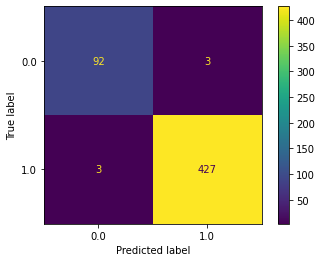

In [26]:
plot_confusion_matrix(lr, X_test, y_test);